# Datorseende projekt 2023 - Weber
###I princip samma ipynb som YOLOv7... men gjord för att kunna lämnas in. 
Majoriteten av training och testing har gjorts i YOLOv7 colab filen, hade en hel del strul med att endast hitta classen med index 0 (den som råka vara först i listan). 


In [2]:
#@title Början stegen med så smakar det gott.
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/datorseende

%cd yolov7
!pip install -r requirements.txt

Mounted at /content/drive
/content/drive/MyDrive/datorseende
/content/drive/MyDrive/datorseende/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00


# Testing av mera bilder etc. Kan ändras hela tiden

In [ ]:
!python detect.py --weights runs/train/exp10/weights/best.pt --conf 0.1 --source robotchild.jpg

Namespace(weights=['runs/train/exp10/weights/best.pt'], source='robotchild.jpg', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36492560 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 adults, 6 kidss, 3 robotss, Done

# 50 Epochs:
(Började med 50, har haft problem med att min tid tar slut i Colab och redan en gång köpt 100 units för att kunna fortsätta. Vidare training från exp9 +150 epochs)

In [3]:
!python detect.py --weights runs/train/exp10/weights/best.pt --conf 0.5 --source groupImage.jpg

Namespace(weights=['runs/train/exp10/weights/best.pt'], source='groupImage.jpg', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36492560 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

4 adultss, 5 kidss, Done. (1589.1m

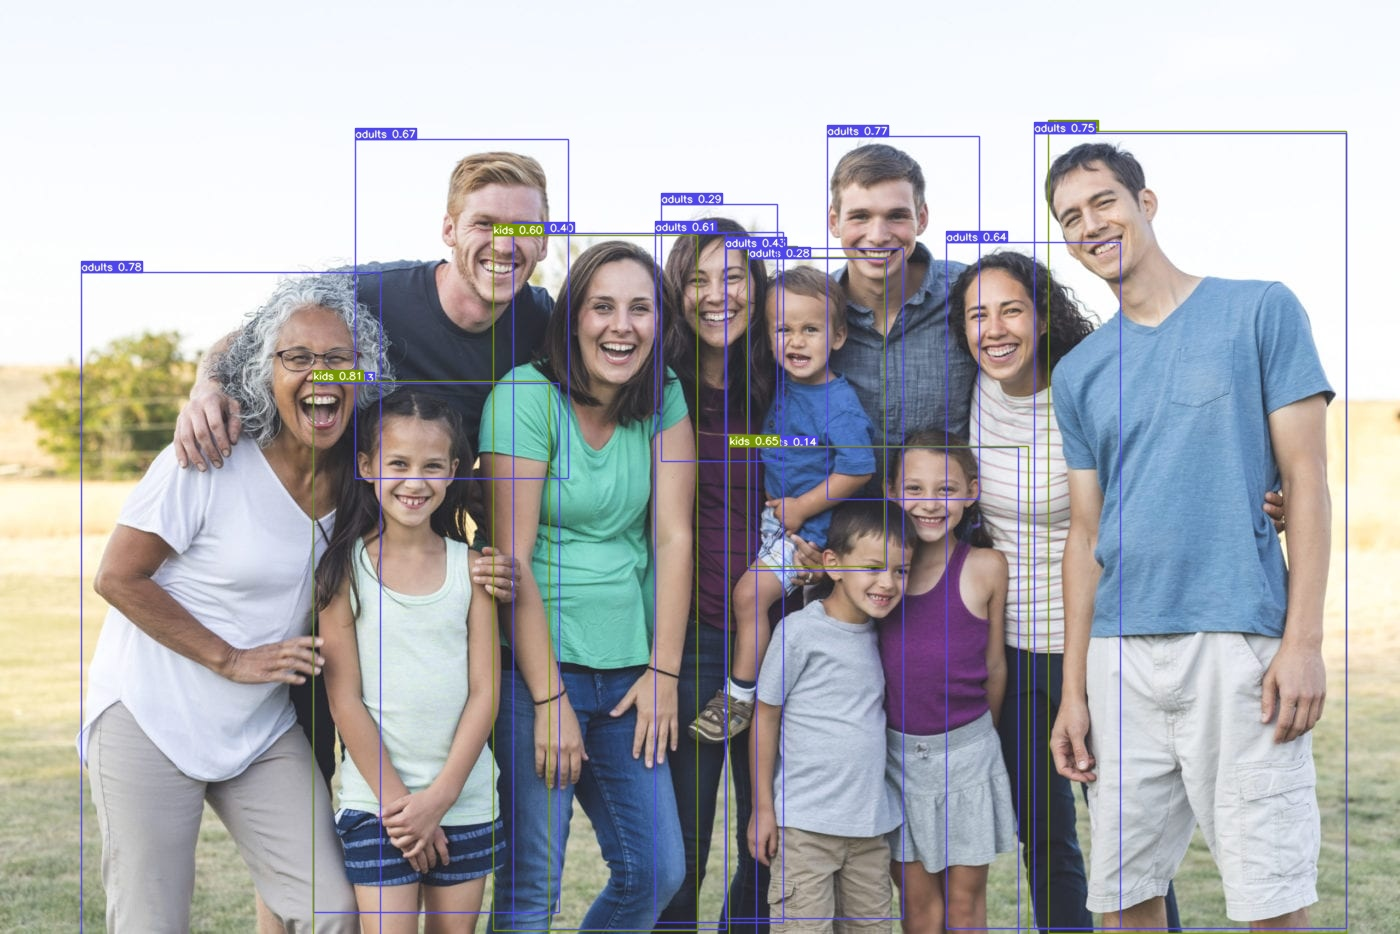

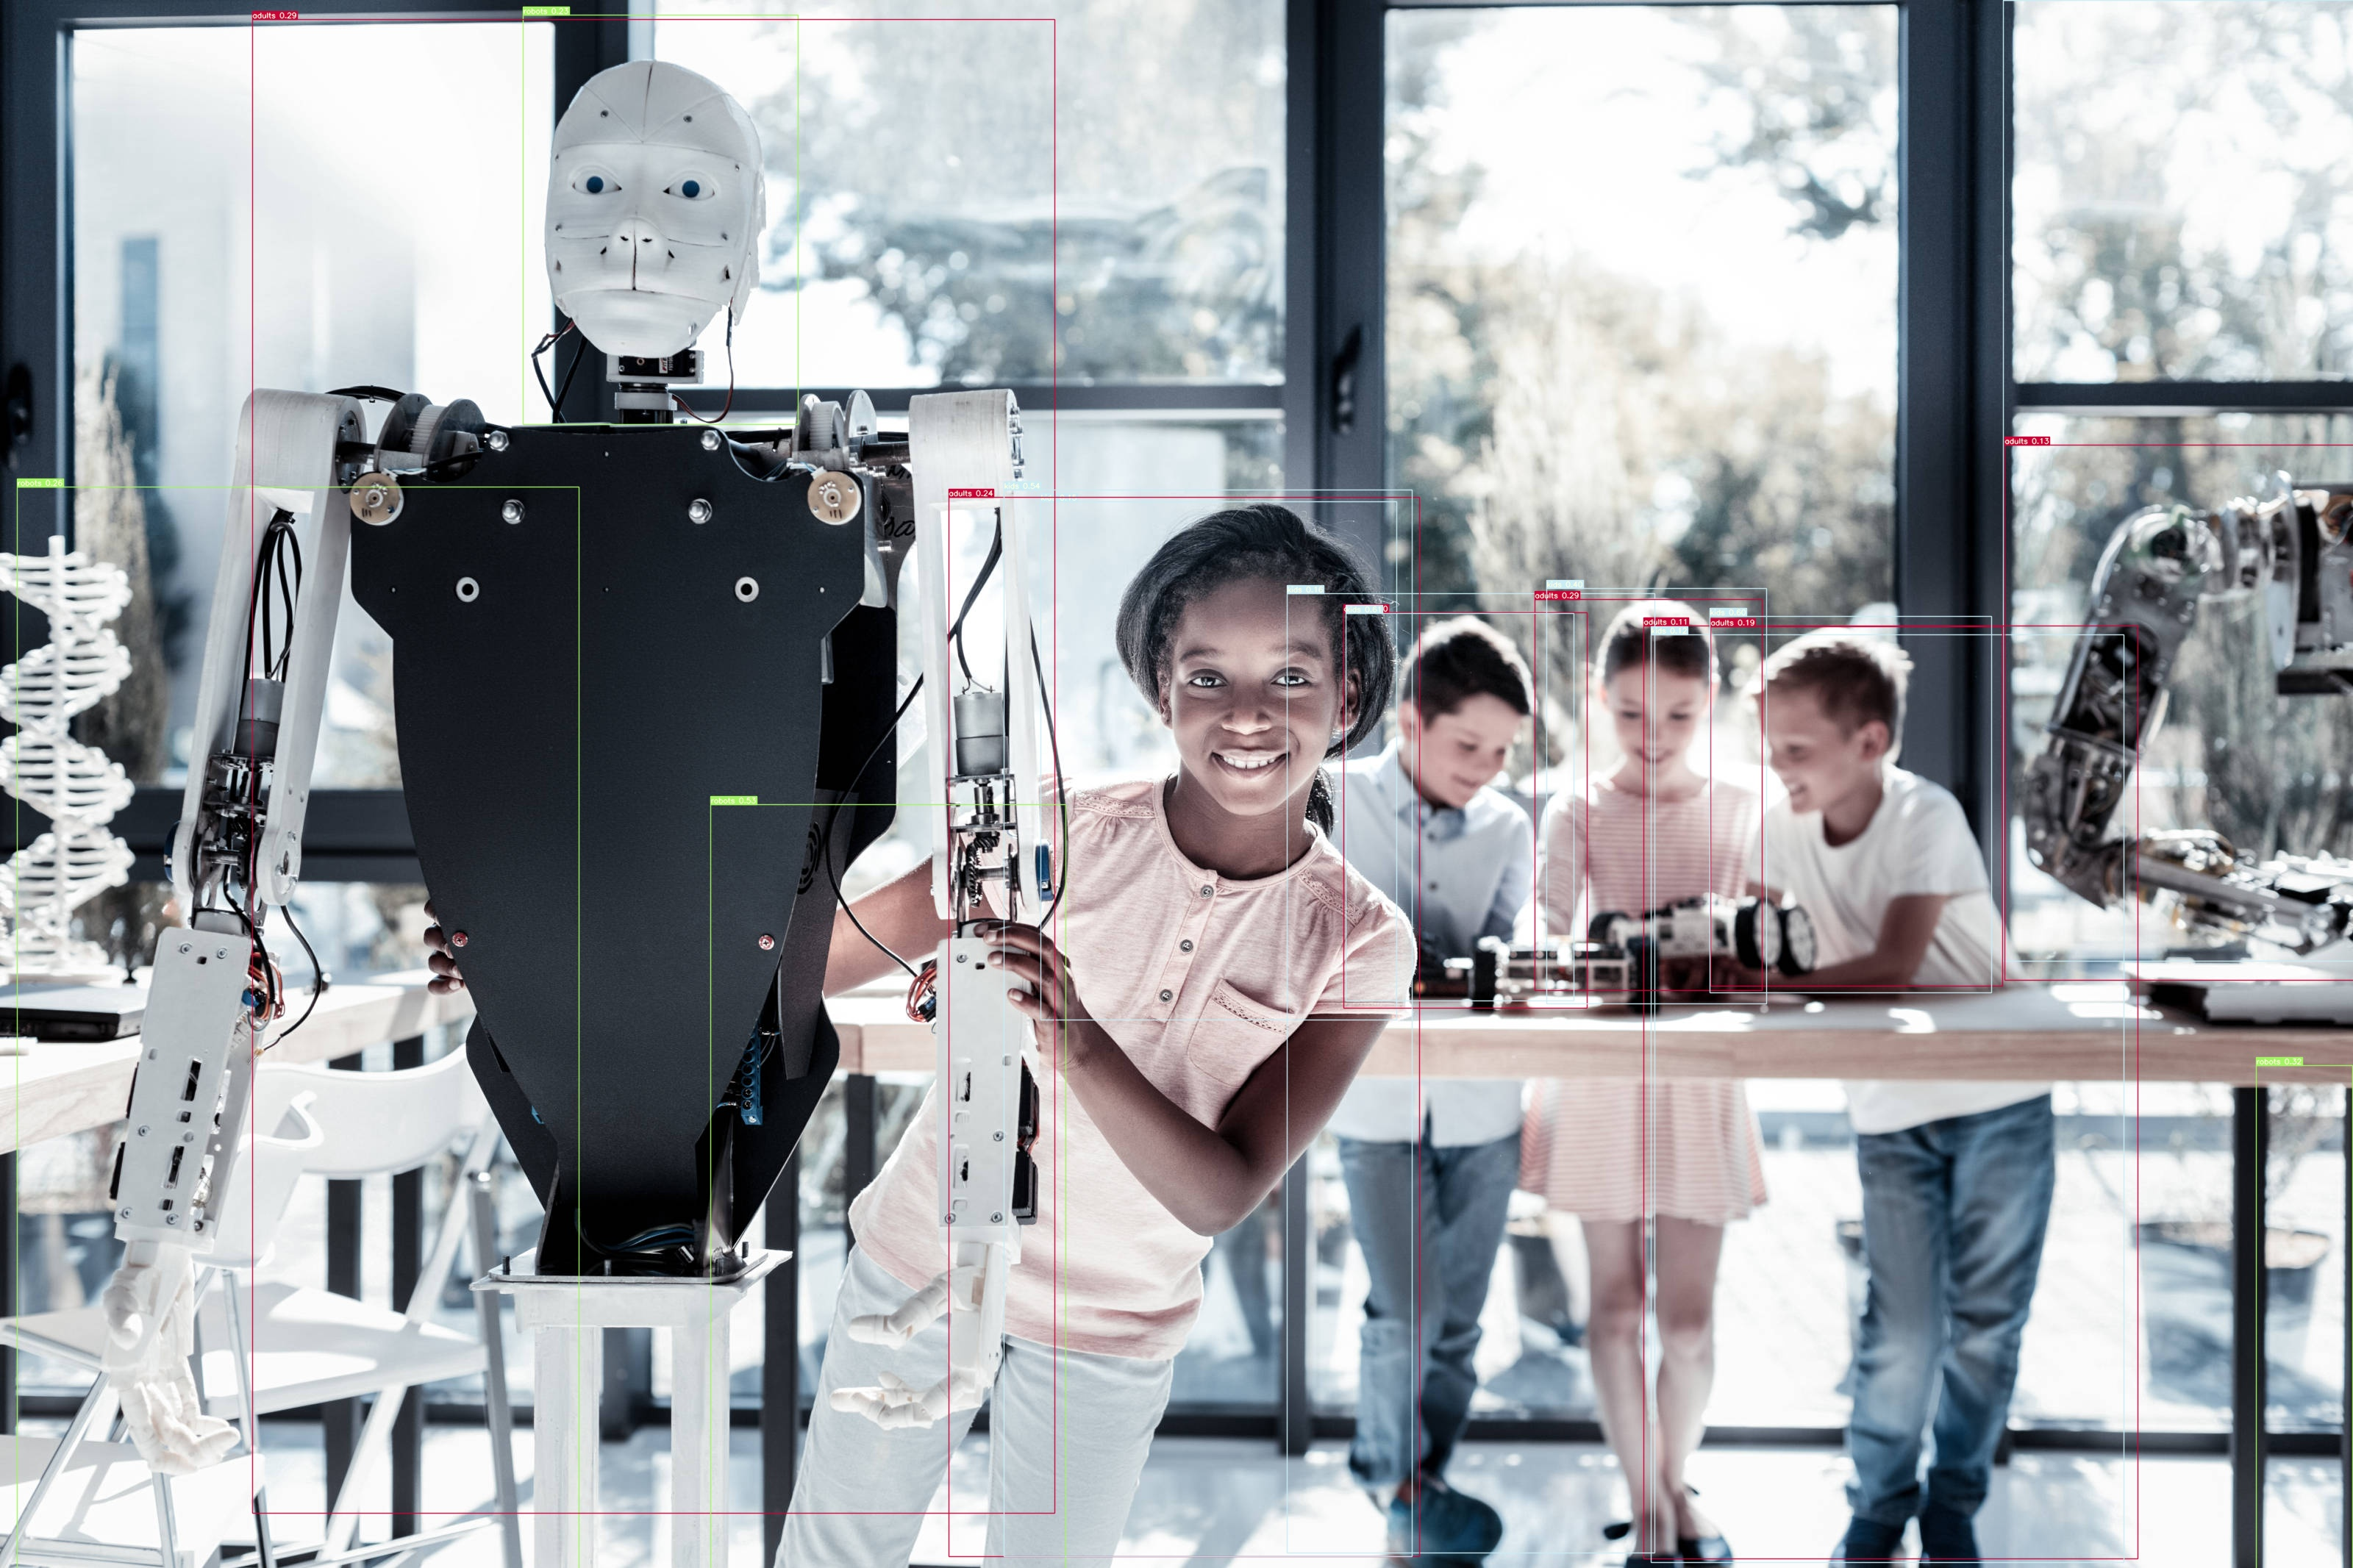

In [ ]:
#@title Efter 50 epochs training resultat på grupp bild. Detect scriptet runnas ovanför  för denna bild + en extra insatt från testing med robot, några fel.

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/drive/MyDrive/datorseende/yolov7/runs/detect/exp26/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1

In [ ]:
#@title Detection testing på video, finns nedan. 
%cd yolov7/
!python detect.py --weights runs/train/exp9/weights/best.pt --conf 0.1 --source wolfSmash.mp4

In [ ]:
%cd /content/drive/MyDrive/datorseende

/content/drive/MyDrive/datorseende


# Testade x antal lösningar för att spela en mp4 fil men inget ville fungera, Visa nerladdad mp4 + inlämnad


exp27/wolfSmash.mp4

In [ ]:
import glob
from IPython.display import HTML, display



!sudo apt-get install -y --no-install-recommends ffmpeg > /dev/null

def display_mp4s(folder_path, limit=10000):
    i = 0
    for video_path in glob.glob(f"{folder_path}/*.mp4"):
        if i < limit:
            display(HTML(f'<video controls><source src="wolfSmash.mp4" type="video/mp4"></video>'))
            print("\n")
        i += 1

display_mp4s('/content/drive/MyDrive/datorseende/yolov7/runs/detect/exp27')

In [ ]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video('/content/drive/MyDrive/datorseende/yolov7/runs/detect/exp27/wolfSmash.mp4')

Output hidden; open in https://colab.research.google.com to view.

# 50 + 150 Epochs:


In [ ]:
#@title Kör detectionen på samma bild som tidigare men med en mera tränad model. Prestanda test.
%cd yolov7
!python detect.py --weights runs/train/exp10/weights/best.pt --conf 0.1 --source groupImage.jpg

/content/drive/MyDrive/datorseende/yolov7
Namespace(weights=['runs/train/exp10/weights/best.pt'], source='groupImage.jpg', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36492560 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is tr

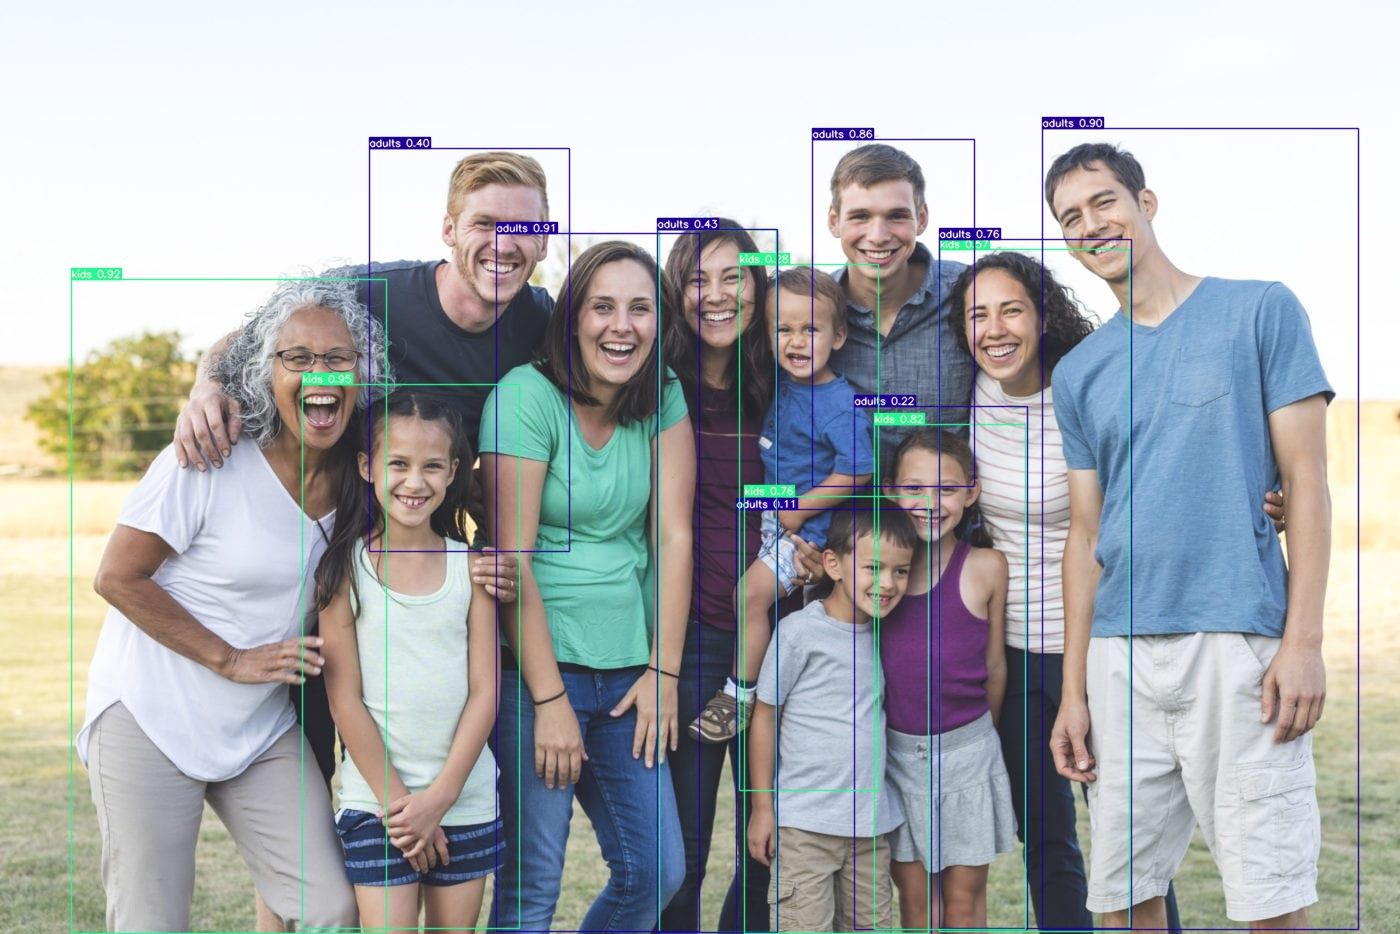

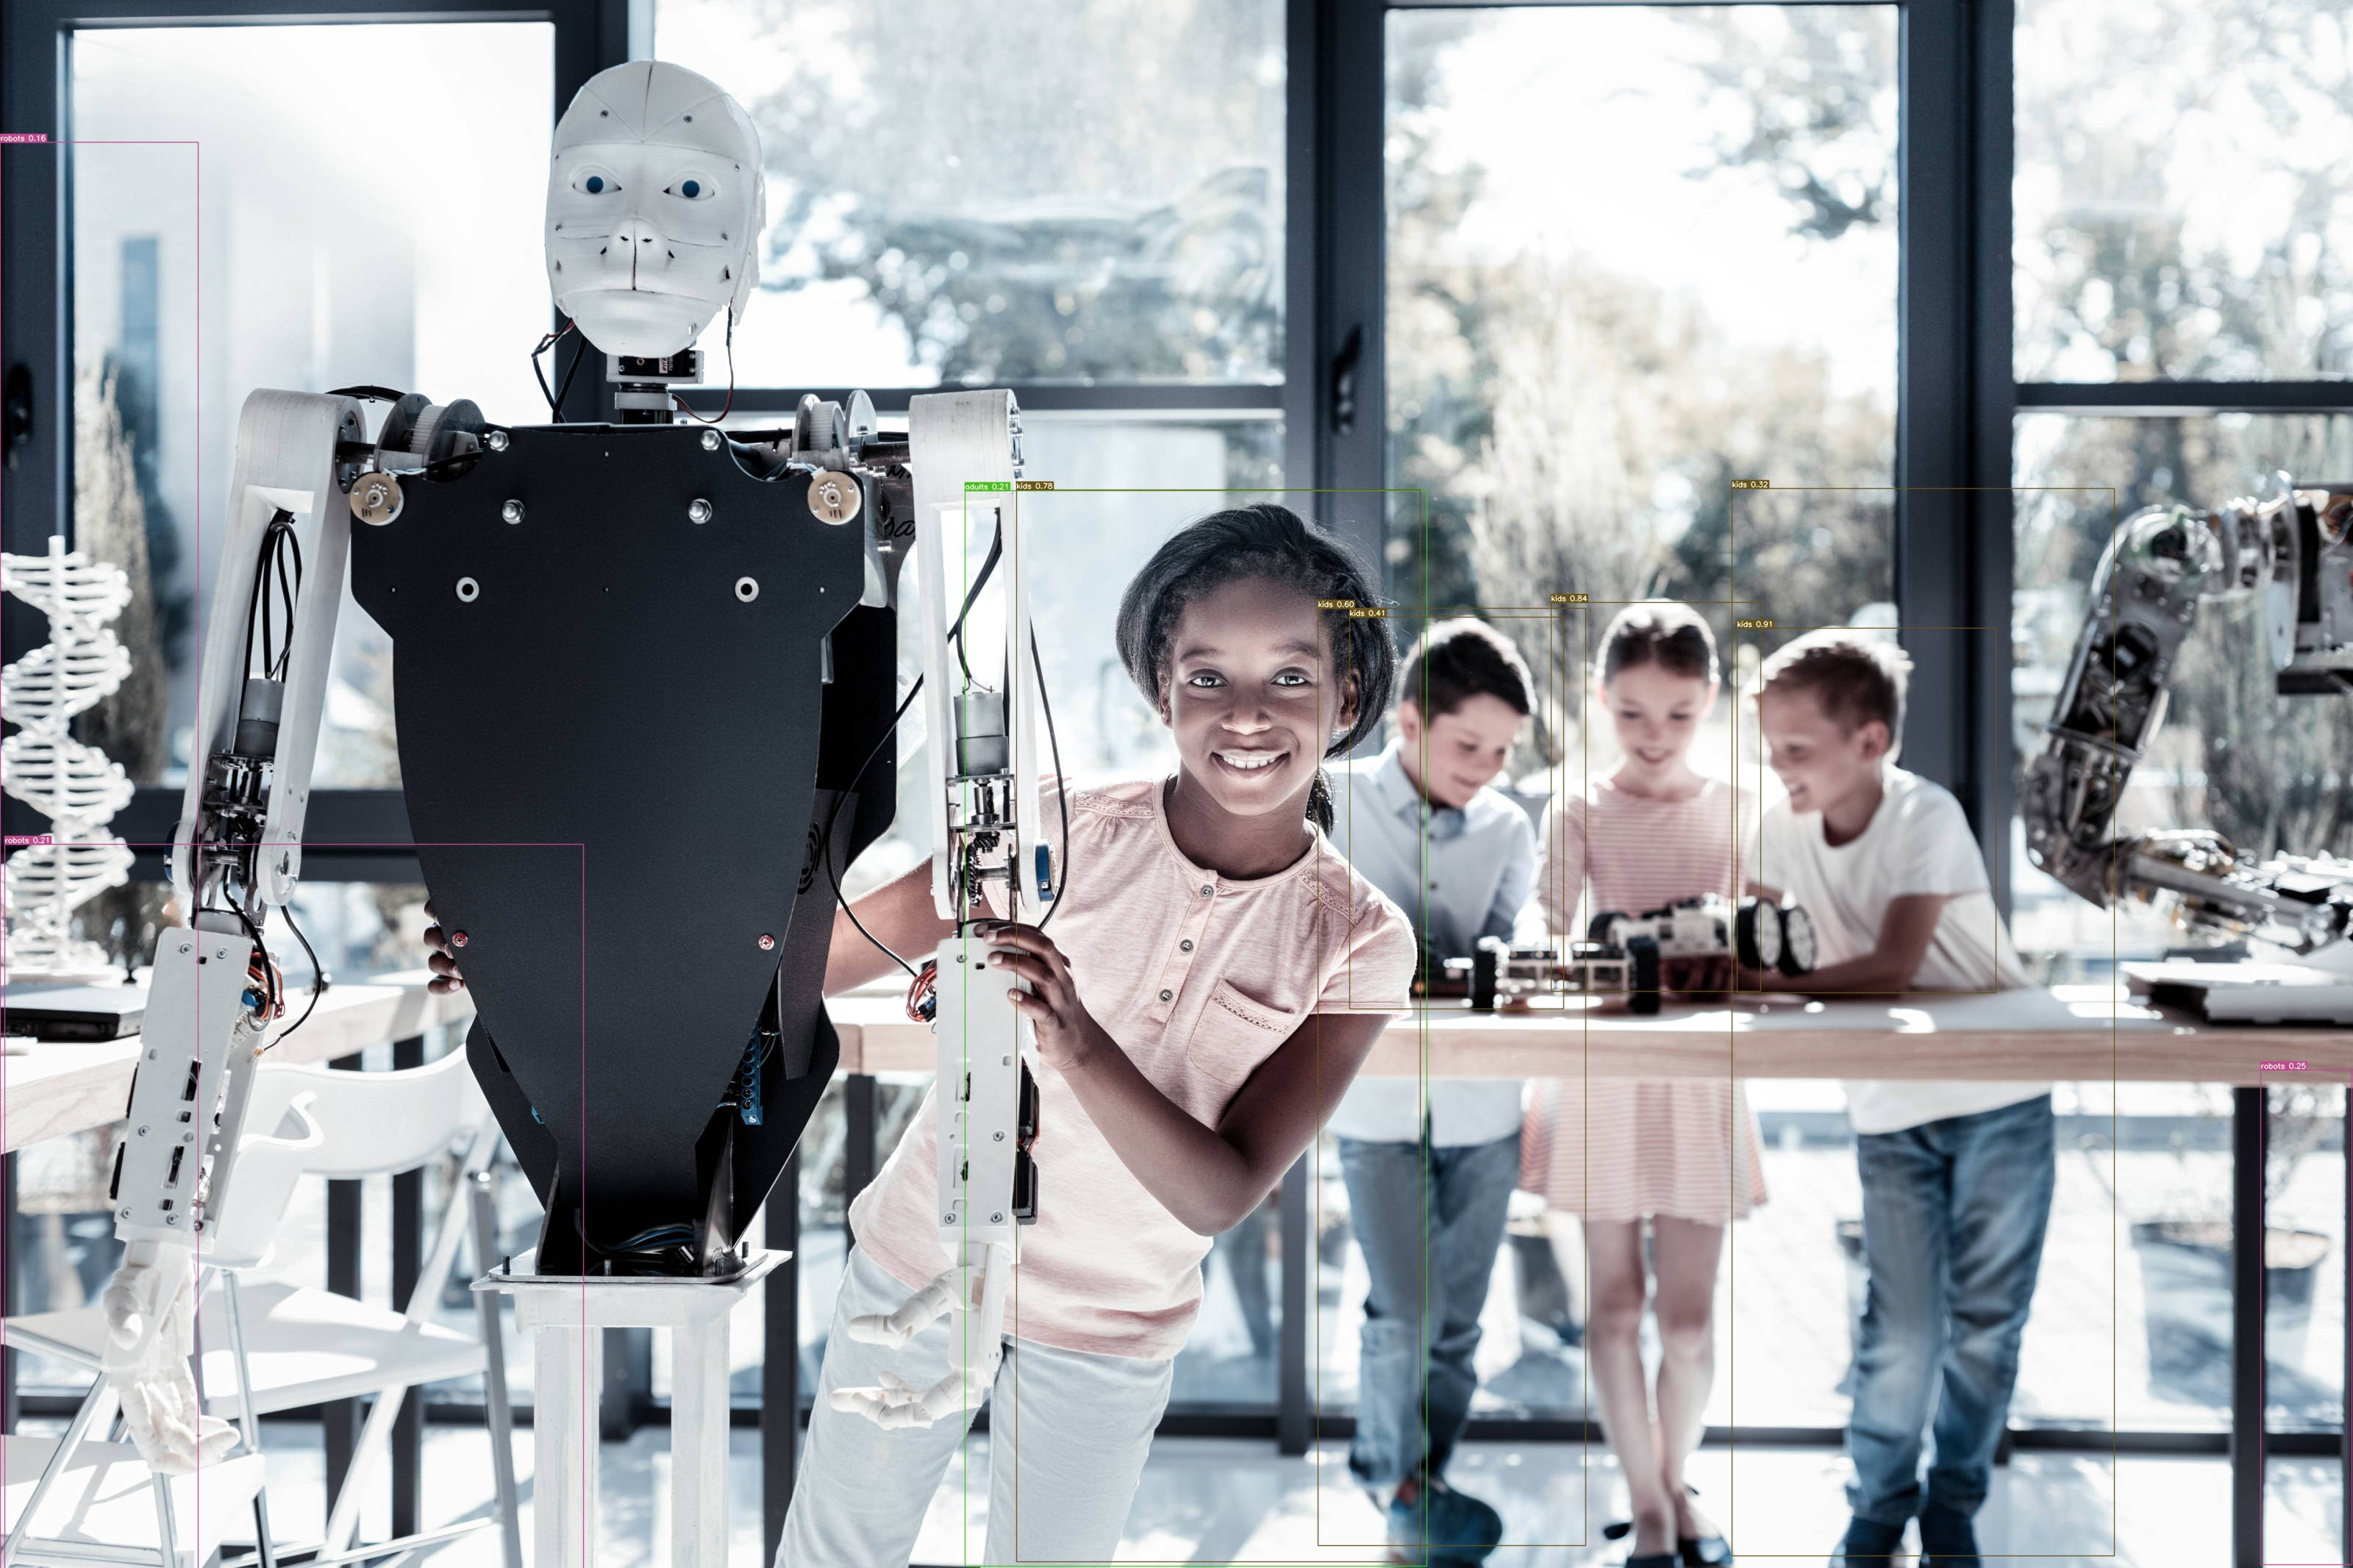

In [ ]:
#@title Samma två bilder som tidigare men med mer tränade modellen
import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/drive/MyDrive/datorseende/yolov7/runs/detect/exp29/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1

In [ ]:
#@title Samma sak med videon av Toto Wolff, upploadar filen och visar under feedback. Prestanda test på samma.
!python detect.py --weights runs/train/exp10/weights/best.pt --conf 0.1 --source wolfSmash.mp4

Namespace(weights=['runs/train/exp10/weights/best.pt'], source='wolfSmash.mp4', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36492560 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

video 1/1 (1/44) /content/drive/MyD

# Extra

In [ ]:
#@title Lite längre video snutt med hoppande shots. Måste avbryta mitt i för hade inte tid för den att gå genom 3360 frames. Uppladdar video samt visar på feedback tillfället.
!python detect.py --weights runs/train/exp10/weights/best.pt --conf 0.1 --source Topgear.mp4

Namespace(weights=['runs/train/exp10/weights/best.pt'], source='Topgear.mp4', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36492560 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

video 1/1 (1/3360) /content/drive/MyD

In [ ]:
#@title Endast barn
!python detect.py --weights runs/train/exp10/weights/best.pt --conf 0.1 --source manykids.jpg

Namespace(weights=['runs/train/exp10/weights/best.pt'], source='manykids.jpg', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36492560 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

5 kidss, Done. (1670.6ms) Inference,

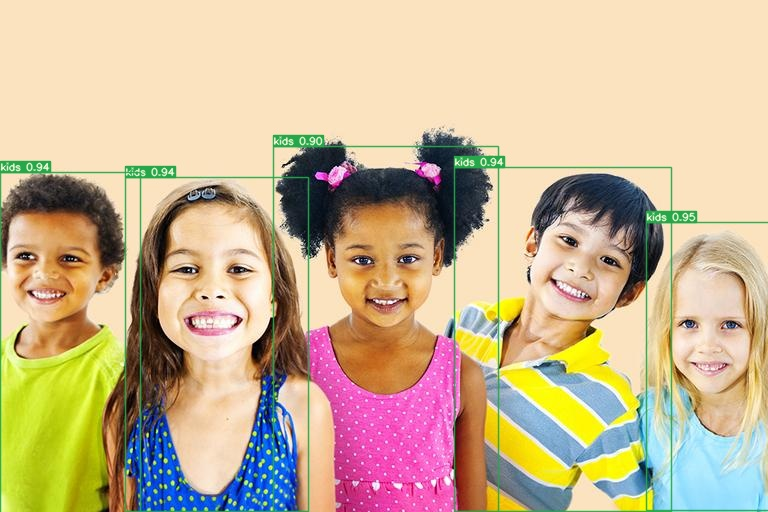

In [ ]:
i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/drive/MyDrive/datorseende/yolov7/runs/detect/exp34/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1